## Singular Value Decomposition

### Greyscale image compression

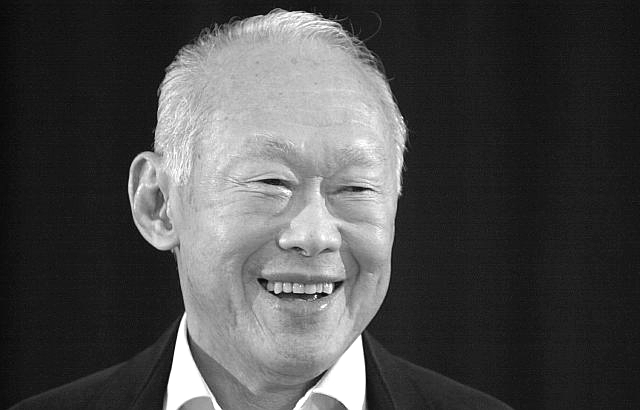

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
csv/lky.jpg,101785,FALSE,664,2017-07-26 01:29:47,2017-07-26 01:29:47,2017-07-26 01:29:53,1000,1000,ubuntu,ubuntu


 num [1:410, 1:640, 1:3] 0.051 0.051 0.051 0.051 0.051 ...


In [25]:
library(jpeg)
library(IRdisplay)

lky <- readJPEG("csv/lky.jpg")
display_jpeg(file= "csv/lky.jpg")
file.info("csv/lky.jpg")
str(lky)

# picture of dimensions 640*410
# there will be three RGB channels in JPEG usually
# however, since this is a coded as a greyscale image, there will be only 1 K channel
# K channel values are replicated by default in the 3 RGB channel holders

In [16]:
# lky[,,1] == lky[,,2] == lky[,,3]

# get min/max grayscale K values
min(lky[,,1])
max(lky[,,1])

# compute SVD of lky grayscale matrix
s <- svd(lky[,,1])
str(s)

# why is v a rectangular matrix??
# because the latter terms in the matrix get multiplied by zero anyways, so they are irrelevant and can be dropped...
# without impacting the original matrix values themselves

[1] 0.03137255

[1] 1

List of 3
 $ d: num [1:410] 200.5 36.1 28.8 18.3 16.5 ...
 $ u: num [1:410, 1:410] -0.00948 -0.00974 -0.00993 -0.00949 -0.00894 ...
 $ v: num [1:640, 1:410] -0.00516 -0.00524 -0.00537 -0.00559 -0.00558 ...


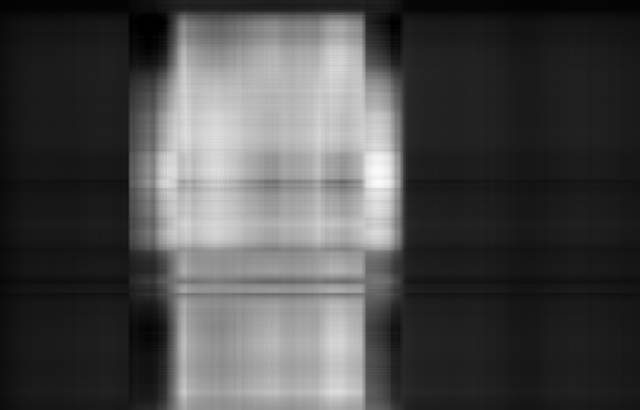

 num [1:410, 1:640] 0.00948 0.00978 0.00992 0.00945 0.00887 ...


,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
csv/lkyC.jpg,10887,FALSE,664,2017-07-26 02:29:11,2017-07-26 02:29:11,2017-07-26 02:29:11,1000,1000,ubuntu,ubuntu


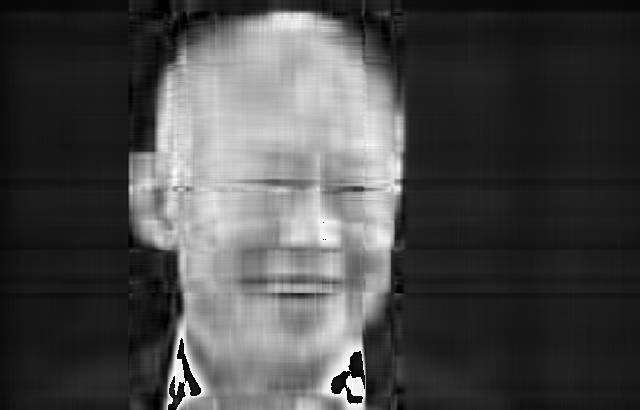

 num [1:410, 1:640] 0.0204 0.0213 0.0222 0.0207 0.0194 ...


,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
csv/lkyC.jpg,16275,FALSE,664,2017-07-26 02:29:11,2017-07-26 02:29:11,2017-07-26 02:29:11,1000,1000,ubuntu,ubuntu


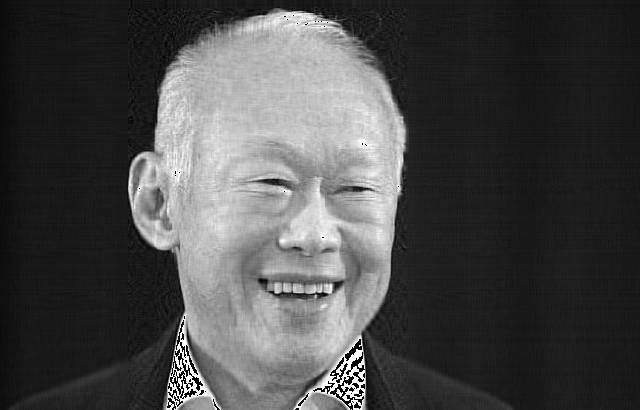

 num [1:410, 1:640] 0.0486 0.0505 0.0527 0.0498 0.0456 ...


,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
csv/lkyC.jpg,23816,FALSE,664,2017-07-26 02:29:11,2017-07-26 02:29:11,2017-07-26 02:29:11,1000,1000,ubuntu,ubuntu


In [67]:
compressLKY <- function(svdObject, rank = 50) {
    # calculate rank k decomp
    lkyC <- svdObject$u[,1:rank]%*%diag(svdObject$d[1:rank])%*%t(svdObject$v[,1:rank])
    str(lkyC)

    # write and display file info
    writeJPEG(lkyC, "csv/lkyC.jpg")
    display_jpeg(file= "csv/lkyC.jpg")
    file.info("csv/lkyC.jpg")
}

compressLKY(s, 2)
compressLKY(s, 10)
compressLKY(s)

#### Seeing how 

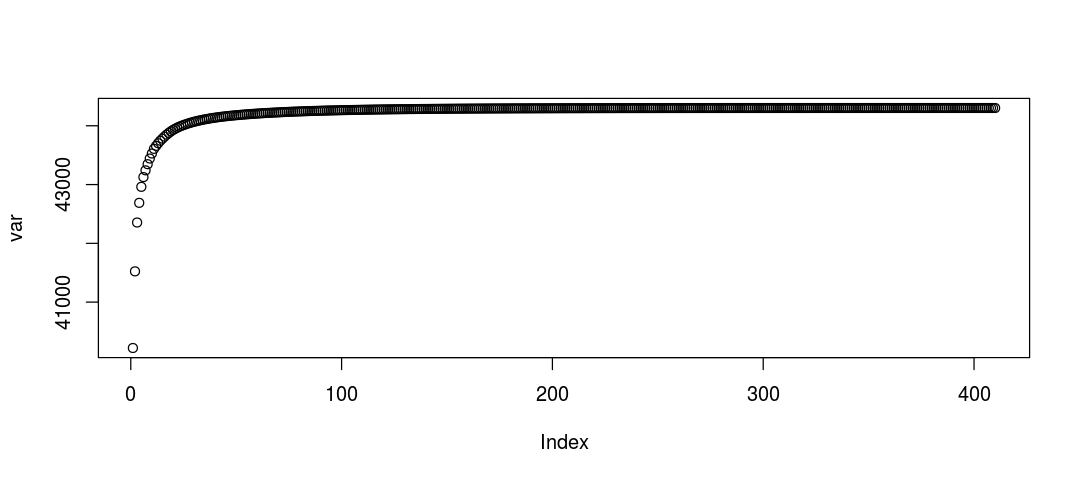

In [65]:
# why do we square when we already know diagonal matrix d is already non-negative
# because s$d^2 is actually the eignevalues of the the XX^T square matrix, which captures variability in data

options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
var <- cumsum(s$d^2)
plot(var)

### Colour image compression

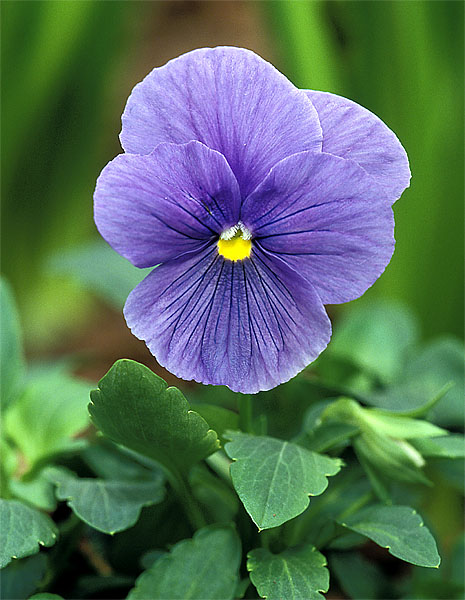

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
csv/pansy.jpg,80673,FALSE,664,2017-07-26 01:29:45,2017-07-26 01:29:45,2017-07-26 01:57:24,1000,1000,ubuntu,ubuntu


 num [1:600, 1:465, 1:3] 0.345 0.275 0.282 0.294 0.275 ...


In [31]:
pansy <- readJPEG("csv/pansy.jpg")
display_jpeg(file= "csv/pansy.jpg")
file.info("csv/pansy.jpg")
str(pansy)

In [36]:
s1 <- svd(pansy[,,1]) # R channel
s2 <- svd(pansy[,,2]) # G channel
s3 <- svd(pansy[,,3]) # B channel

str(s1)

List of 3
 $ d: num [1:465] 188 46.3 36.6 22.1 20.8 ...
 $ u: num [1:600, 1:465] -0.0373 -0.0306 -0.0302 -0.0305 -0.03 ...
 $ v: num [1:465, 1:465] -0.0417 -0.0348 -0.0338 -0.0337 -0.0331 ...


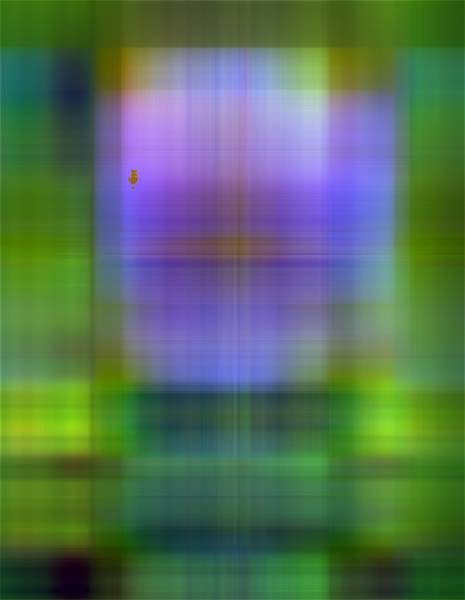

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
csv/pansyC.jpg,17024,FALSE,664,2017-07-26 02:27:43,2017-07-26 02:27:43,2017-07-26 02:27:43,1000,1000,ubuntu,ubuntu


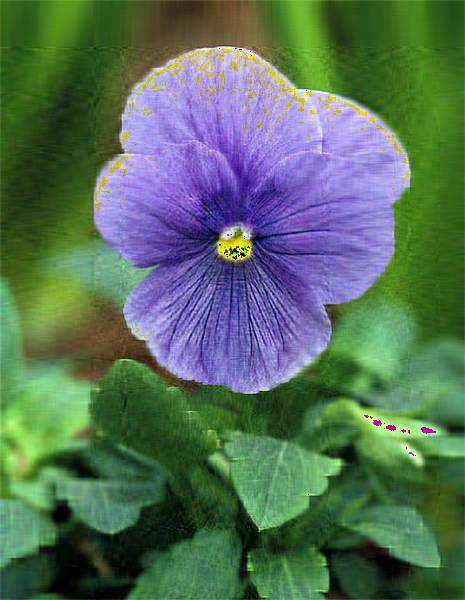

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
csv/pansyC.jpg,40534,FALSE,664,2017-07-26 02:27:43,2017-07-26 02:27:43,2017-07-26 02:27:43,1000,1000,ubuntu,ubuntu


In [63]:
# do i look like i know what a jpeg is
compressPansy <- function(svd1, svd2, svd3, rank = 50) {
    # calculate rank k decomposition
    pansyC <- array(dim = c(600,465,3))
    pansyC[,,1] <- svd1$u[,1:rank]%*%diag(svd1$d[1:rank])%*%t(svd1$v[,1:rank])
    pansyC[,,2] <- svd2$u[,1:rank]%*%diag(svd2$d[1:rank])%*%t(svd2$v[,1:rank])
    pansyC[,,3] <- svd3$u[,1:rank]%*%diag(svd3$d[1:rank])%*%t(svd3$v[,1:rank])

    # write and display file info
    writeJPEG(pansyC, "csv/pansyC.jpg")
    display_jpeg(file= "csv/pansyC.jpg")
    file.info("csv/pansyC.jpg")
}

compressPansy(s1, s2, s3, 2)
compressPansy(s1, s2, s3)

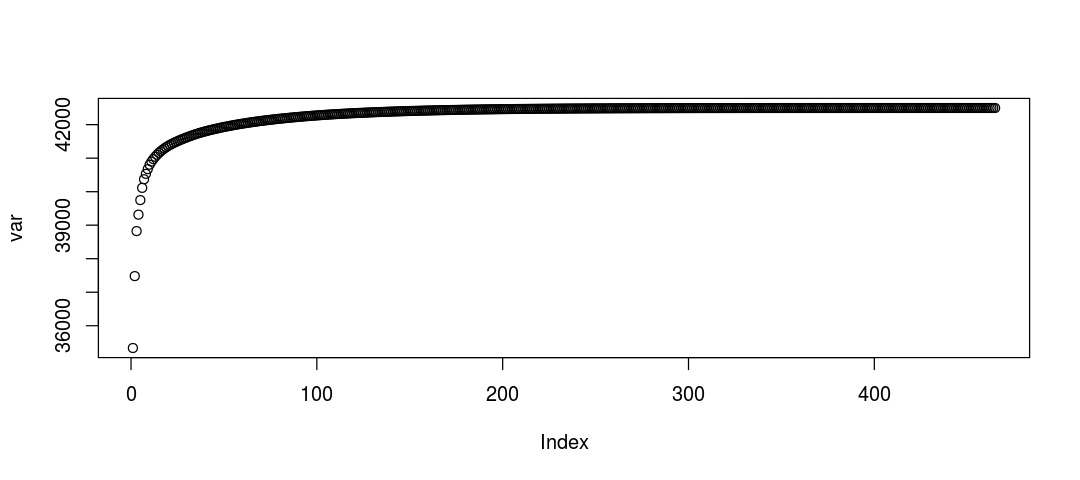

In [66]:
var <- cumsum(s1$d^2)
plot(var)

### Movie recommendation (censored data)

In [70]:
ratings <- read.csv("csv/ratings.csv")

# create preference matrix to denote which users have rated what movies
data2 <- matrix(nrow=length(unique(ratings$userId)), ncol=length(unique(ratings$movieId)))
rownames(data2) <- unique(ratings$userId)
colnames(data2) <- unique(ratings$movieId)

for (i in 1:NROW(ratings)) {
    data2[as.character(ratings$userId[i]), as.character(ratings$movieId[i])] <- ratings$rating[i]
}

# we can observe there are pletny of missing entries
head(data2)

,6,22,32,50,110,164,198,260,296,303,⋯,7213,7252,7274,7275,4828,92481,93855,98956,3782,60189
1,2,3,2,5.0,4,3,3,5,4,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,3,4.0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,5,NA,NA,5,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,4.5,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [71]:
set.seed(1)
# here we are sampling without using `caTools` library

# partitioning rows (users)
splR <- sample(1:nrow(data2), 0.98*nrow(data2))
splRC <- setdiff(1:nrow(data2), splR)

# partitioning cols (movies)
set.seed(2)
splC <- sample(1:ncol(data2), 0.8*ncol(data2))
splCC <- setdiff(1:ncol(data2), splC)

# setting bottom-right matrix as empty so we can see how the SVD performs on unseen test set
data3 <- data2
data3[splRC,splCC] <- NA

In [75]:
library(recommenderlab)
# WARNING: long computation time
p <- funkSVD(data3, k=2) # k is the rank of the SVD approximation

In [80]:
str(p)

# calculate prediction error
Predict <- p$U%*%t(p$V)
mean((Predict[splRC, splCC] - data2[splRC, splCC])^2, na.rm = T)

List of 3
 $ U         : num [1:706, 1:2] 2.43 2.95 2.98 2.5 2.3 ...
 $ V         : num [1:8552, 1:2] 1.57 1.32 1.62 1.9 1.98 ...
 $ parameters:List of 6
  ..$ k              : num 2
  ..$ gamma          : num 0.015
  ..$ lambda         : num 0.001
  ..$ min_epochs     : num 50
  ..$ max_epochs     : num 200
  ..$ min_improvement: num 1e-06
 - attr(*, "class")= chr "funkSVD"


[1] 1.240686

4.354278,0.5938355,3.008376,2.612143,2.564679,2.437807,2.499915,2.669553,2.819504,2.466892,⋯,0.5757577,2.274609,1.159753,2.255362,2.266424,2.267421,1.515360,1.769557,1.676824,0.7982202
4.780673,0.7450148,3.724439,3.198667,3.153175,3.063921,3.194922,3.276476,3.482106,3.033965,⋯,0.7209276,2.913313,1.475929,2.907439,2.904566,2.910803,1.924517,2.251050,2.142258,1.0011430
4.018345,0.6100573,3.057337,2.631165,2.591777,2.508064,2.607267,2.694000,2.859720,2.493634,⋯,0.5905473,2.376510,1.205388,2.368923,2.369117,2.373466,1.572343,1.838566,1.748335,0.8198325
4.688187,0.7773287,3.864085,3.302908,3.261621,3.199229,3.359246,3.386635,3.608878,3.138767,⋯,0.7515782,3.065887,1.549143,3.067789,3.057429,3.066127,2.018265,2.362311,2.252120,1.0444391
4.509463,0.6958752,3.482004,2.992765,2.949365,2.861476,2.980404,3.065068,3.256003,2.837793,⋯,0.6734677,2.717301,1.377227,2.710633,2.709033,2.714535,1.796068,2.100571,1.998467,0.9351285
4.160715,0.6479247,3.239294,2.782170,2.742543,2.664607,2.778298,2.849813,3.028567,2.638853,⋯,0.6269828,2.533384,1.283493,2.528193,2.525770,2.531171,1.673610,1.957555,1.862907,0.8706757
4.092849,0.5646874,2.857228,2.478440,2.434288,2.318533,2.381304,2.533436,2.677251,2.341543,⋯,0.5473985,2.167131,1.104290,2.150107,2.159455,2.160751,1.442614,1.684867,1.597214,0.7590198
5.097876,0.7638923,3.833128,3.302274,3.251589,3.139976,3.259039,3.380392,3.586201,3.128361,⋯,0.7395992,2.969991,1.507312,2.958716,2.960586,2.965547,1.966562,2.299178,2.185460,1.0265934
4.802213,0.7627409,3.806321,3.264164,3.219490,3.137563,3.278857,3.344607,3.557496,3.097913,⋯,0.7378904,2.990691,1.513874,2.987146,2.981941,2.989000,1.973467,2.308799,2.198440,1.0249242
4.294778,0.6213933,3.128883,2.703270,2.658993,2.553044,2.638389,2.765562,2.929184,2.558000,⋯,0.6019370,2.403032,1.221597,2.389899,2.395051,2.398006,1.594646,1.863562,1.769421,0.8351520
6.761122,0.8282853,4.246323,3.722559,3.642185,3.394727,3.427836,3.796801,3.988306,3.502288,⋯,0.8044890,3.112514,1.596532,3.067246,3.099565,3.095928,2.090065,2.436936,2.299980,1.1136536


,296,451,541,553,648,999,1034,1073,1097,1129,⋯,4875,6203,4250,63239,27882,1932,6825,7275,4828,60189
26,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
175,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
221,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
235,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
341,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
356,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
359,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
383,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
384,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
402,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
